# NBC

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv('./TitanicDataset.csv')

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

In [18]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
df['Age']=SimpleImputer(strategy='median').fit_transform(df[['Age']])

In [20]:
df['Embarked']=SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])
df['Embarked']=LabelEncoder().fit_transform(df[['Embarked']])

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
X=df.drop('Survived', axis=1)
y=df['Survived']

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,0,3,35.0,0,0,8.0500,2


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
clf = GaussianNB()

In [27]:
clf.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[86, 19],
       [37, 37]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.6871508379888268

# KNN

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
df = pd.read_csv('./glass.csv')

In [34]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [35]:
X=df.drop('Type',axis=1)
y=df['Type']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [37]:
clf = KNeighborsClassifier(n_neighbors=3)

In [38]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.6461538461538462

# KMeans

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('./Iris.csv')

In [46]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
X = np.array(df.iloc[:,1:-1].values)

In [51]:
def kmeans(X, K, max_iters):
    centroids = X[:K]
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis]-centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels==k].mean(axis=0) for k in range(K)])
        if np.all(new_centroids==centroids):
            break
        centroids=new_centroids
    return labels, centroids

In [53]:
labels, c = kmeans(X, 3, 20)

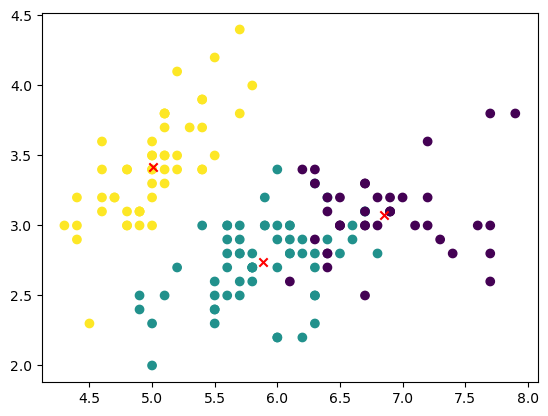

In [55]:
plt.scatter(X[:, 0], X[:,1],c=labels)
plt.scatter(c[:,0], c[:,1], marker='x', color='red')
plt.show()

# Agglomerative Clustering

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

In [71]:
data=load_iris().data[:6]

In [72]:
def proximity_matrix(data):
    n = data.shape[0]
    mat = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            mat[i,j] = np.linalg.norm(data[i]-data[j])
            mat[j,i]=mat[i,j]
    return mat
proximity_matrix(X)

array([[0.        , 0.53851648, 0.50990195, 0.64807407, 0.14142136,
        0.6164414 ],
       [0.53851648, 0.        , 0.3       , 0.33166248, 0.60827625,
        1.09087121],
       [0.50990195, 0.3       , 0.        , 0.24494897, 0.50990195,
        1.08627805],
       [0.64807407, 0.33166248, 0.24494897, 0.        , 0.64807407,
        1.16619038],
       [0.14142136, 0.60827625, 0.50990195, 0.64807407, 0.        ,
        0.6164414 ],
       [0.6164414 , 1.09087121, 1.08627805, 1.16619038, 0.6164414 ,
        0.        ]])

In [73]:
def plot_dendrogram(data, method):
    mat = linkage(data, method=method)
    dendrogram(mat)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

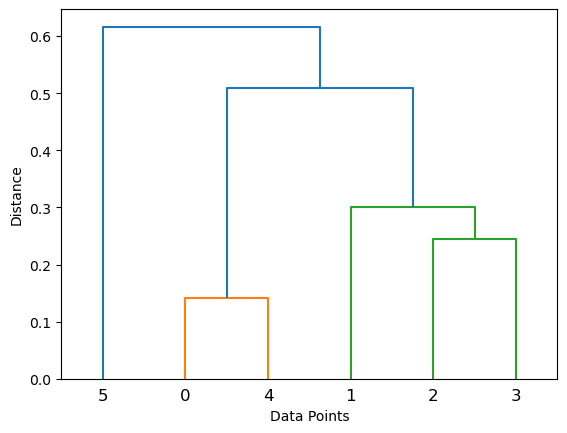

In [74]:
plot_dendrogram(data,'single')

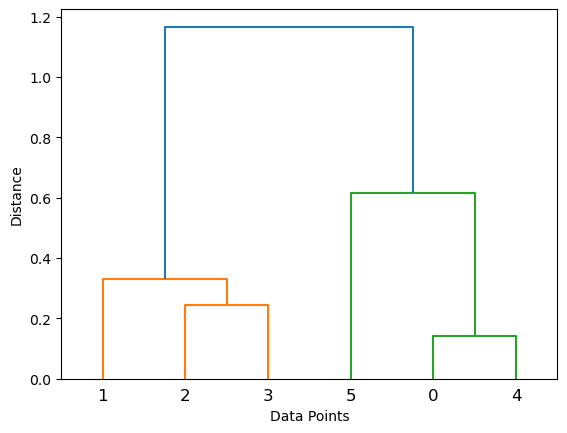

In [75]:
plot_dendrogram(data,'complete')

# PCA

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 

In [77]:
X = load_iris().data

In [78]:
y=load_iris().target

In [82]:
pca = PCA(n_components=2)

In [83]:
x_proj = pca.fit_transform(X)

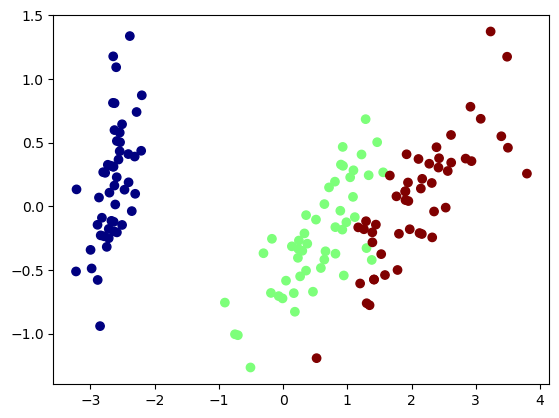

In [84]:
pc1 = x_proj[:,0]
pc2 = x_proj[:,1]
plt.scatter(pc1, pc2, c=y, cmap='jet')

# LDA

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [94]:
X = load_iris().data

In [95]:
y = load_iris().target

In [96]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [98]:
x_proj = lda.fit_transform(X,y)

In [99]:
ld1 = x_proj[:,0]
ld2 = x_proj[:,1]

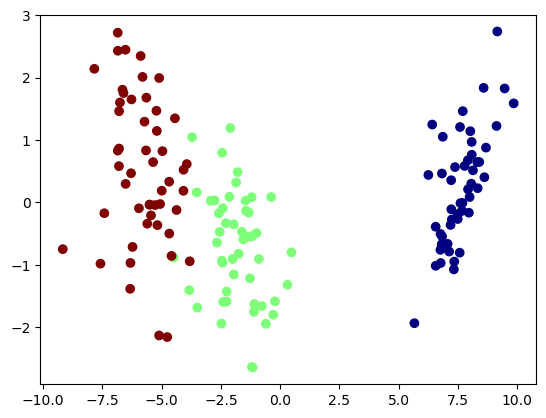

In [101]:
plt.scatter(ld1, ld2,c=y, cmap='jet')
plt.show()